# Full Demo

In [5]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'

In [6]:
# !pip install graphviz

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

from engine import Value
from nn import Neuron, Layer, MLP
from visualize import draw_dot

import seaborn as sns

sns.set_context('talk')

In [8]:
np.random.seed(1337)
random.seed(1337)

In [9]:
from sklearn.datasets import make_moons

In [10]:
X, y = make_moons(n_samples=100, noise=0.1)

# Scale y to be in range [-1, 1]
y = y*2 - 1

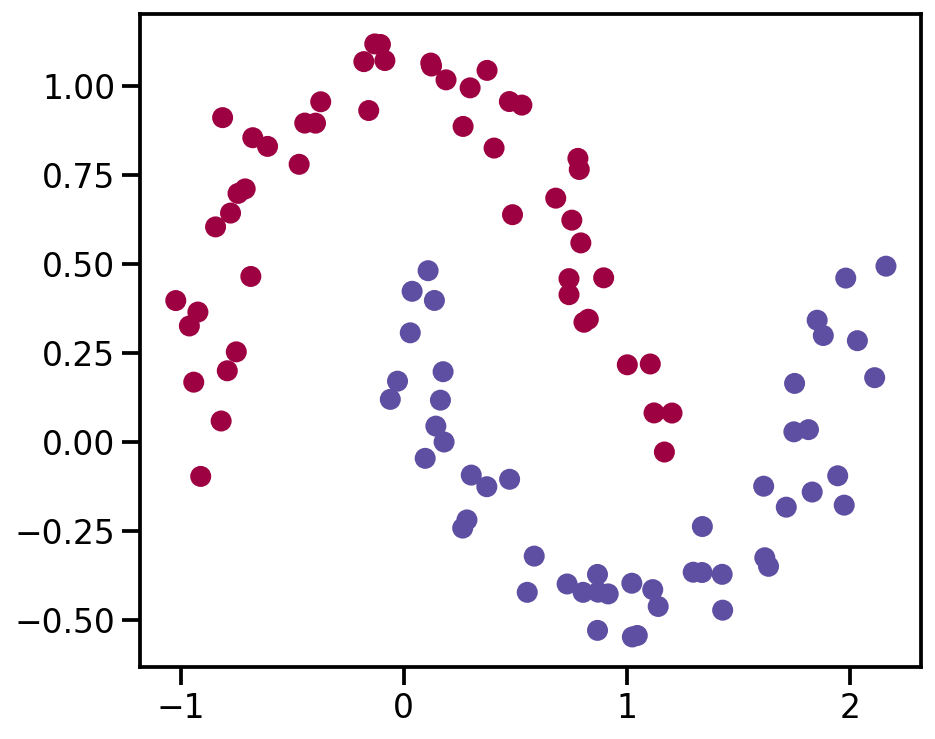

In [11]:
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

### Create Model

In [61]:
model = MLP(2, [4, 1]) # 2 inputs, 1 hidden layer with 4 neurons, 1 output

### Train
#### Define Loss Function

In [62]:
output = model(X[90, :])

In [63]:
output

Value(data=0.3887214770491646)

In [64]:
# draw_dot(output)

In [25]:
def loss():

    # Forward pass
    predictions = [model(x_sample) for x_sample in X]

    # Compute loss
    losses = [(1 + -yi*predi).relu() for yi, predi in zip(y, predictions)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # Compute accuracy
    accuracy = [(yi > 0) == (predi.data > 0) for yi, predi in zip(y, predictions)]

    return total_loss, sum(accuracy) / len(accuracy)

In [37]:
model = MLP(2, [16, 16, 1])

In [43]:
# Optimization
for k in range(500): 

    # forward 
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # Update 
    learning_rate = 0.005 #/ (0.5 * (k + 1))
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 10 == 0:
        print(f'Step {k} loss: {total_loss}, accuracy: {acc}, lr: {learning_rate}')

Step 0 loss: Value(data=0.518568653796116), accuracy: 0.97, lr: 0.005
Step 10 loss: Value(data=0.5184271604626912), accuracy: 0.96, lr: 0.005
Step 20 loss: Value(data=0.5183831572529184), accuracy: 0.97, lr: 0.005
Step 30 loss: Value(data=0.5183202071623207), accuracy: 0.96, lr: 0.005
Step 40 loss: Value(data=0.5183028290280257), accuracy: 0.97, lr: 0.005
Step 50 loss: Value(data=0.5182714198917002), accuracy: 0.96, lr: 0.005
Step 60 loss: Value(data=0.5182353703825442), accuracy: 0.96, lr: 0.005
Step 70 loss: Value(data=0.5181699804863914), accuracy: 0.97, lr: 0.005
Step 80 loss: Value(data=0.5181413570642138), accuracy: 0.96, lr: 0.005
Step 90 loss: Value(data=0.5181027603359893), accuracy: 0.96, lr: 0.005
Step 100 loss: Value(data=0.518043100299018), accuracy: 0.97, lr: 0.005
Step 110 loss: Value(data=0.5180069455625003), accuracy: 0.97, lr: 0.005
Step 120 loss: Value(data=0.5179781362615039), accuracy: 0.95, lr: 0.005
Step 130 loss: Value(data=0.5179008157187975), accuracy: 0.97, l

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.548639298268643, 1.951360701731357)

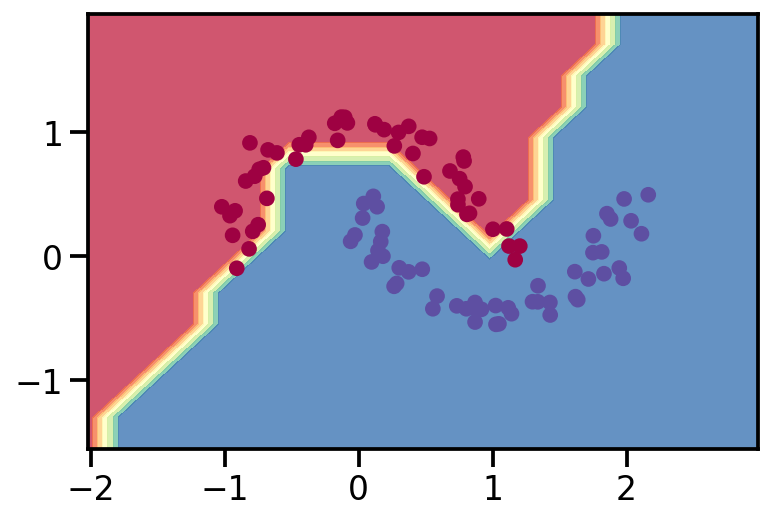

In [42]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.548639298268643, 1.951360701731357)

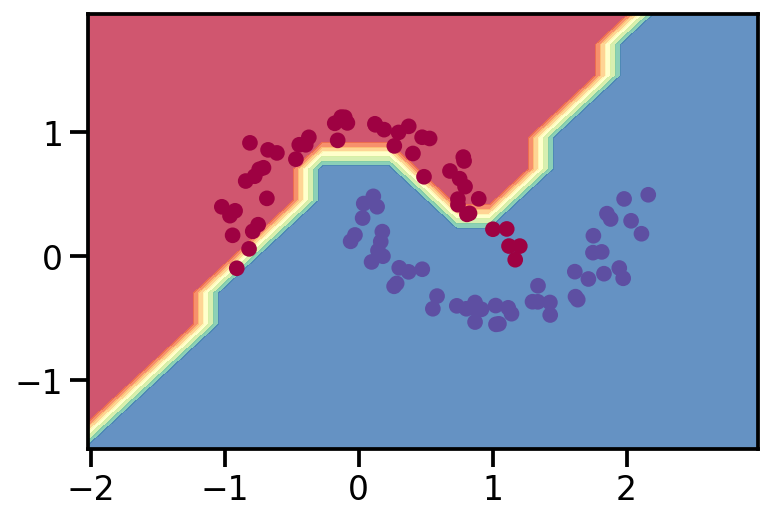

In [40]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.548639298268643, 1.951360701731357)

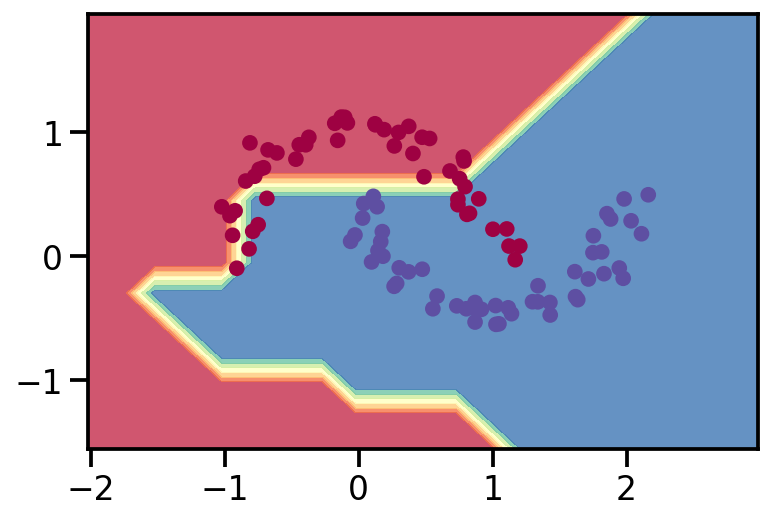

In [28]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.548639298268643, 1.951360701731357)

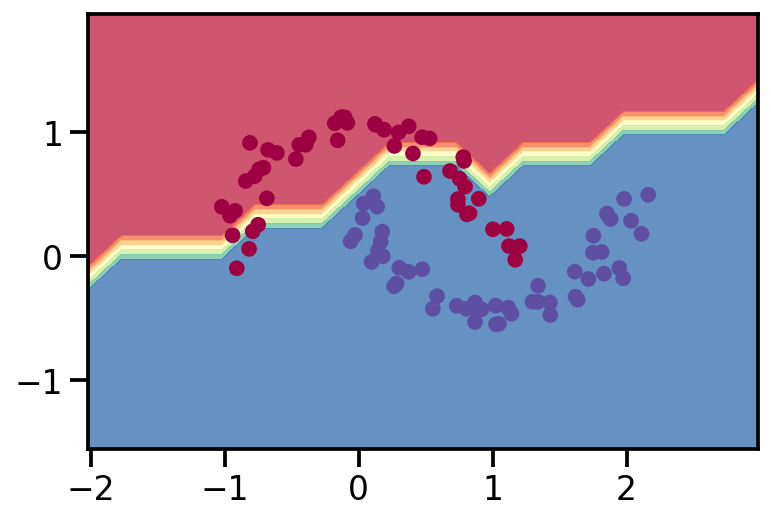

In [18]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.548639298268643, 1.951360701731357)

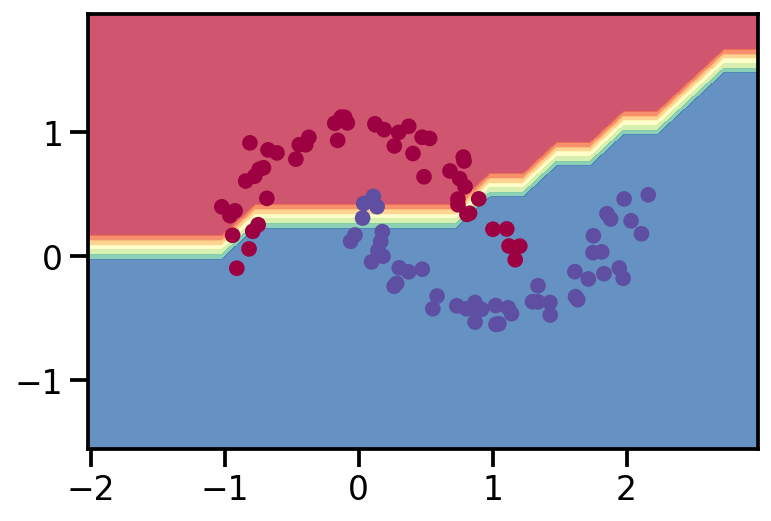

In [15]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



(-1.548639298268643, 1.951360701731357)

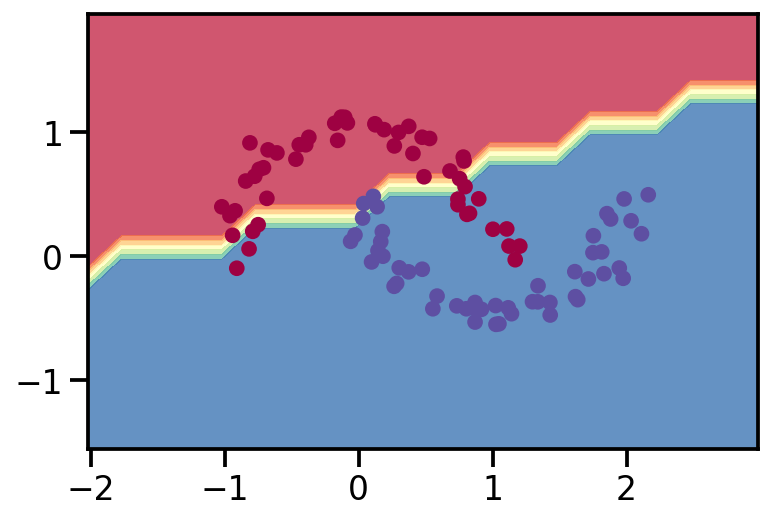

In [11]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

